In [ ]:
!wget -q https://github.com/aztofighi/Persian_Handwritten_Recognition/raw/main/Hoda_Dataset/Hoda_Test_20000.tar.gz
!wget -q https://github.com/aztofighi/Persian_Handwritten_Recognition/raw/main/Hoda_Dataset/Hoda_Train_60000.tar.gz

In [ ]:
!tar xf Hoda_Train_60000.tar.gz
!tar xf Hoda_Test_20000.tar.gz

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 177MB/s]


Epoch [1/2], Step [100/600], Loss: 0.0135
Epoch [1/2], Step [200/600], Loss: 0.0028
Epoch [1/2], Step [300/600], Loss: 0.0892
Epoch [1/2], Step [400/600], Loss: 0.0018
Epoch [1/2], Step [500/600], Loss: 0.1892
Epoch [1/2], Step [600/600], Loss: 0.0018
Epoch [2/2], Step [100/600], Loss: 0.0806
Epoch [2/2], Step [200/600], Loss: 0.0031
Epoch [2/2], Step [300/600], Loss: 0.0272
Epoch [2/2], Step [400/600], Loss: 0.0147
Epoch [2/2], Step [500/600], Loss: 0.0365
Epoch [2/2], Step [600/600], Loss: 0.0638


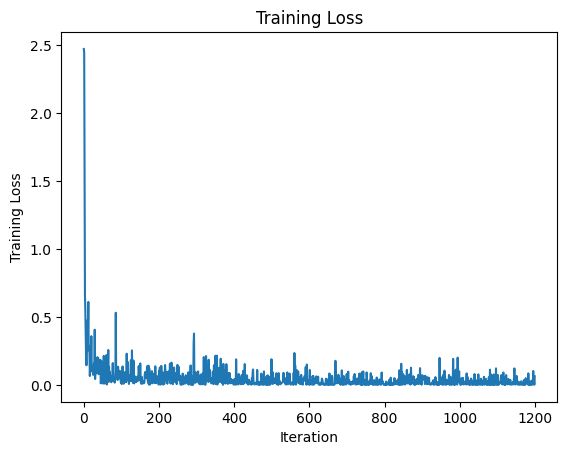

Accuracy of the model on the test images: 99.27 %


In [ ]:
import os
import io
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet50
from PIL import Image
from PIL import ImageOps
from PIL import Image, ImageDraw, ImageFont
import torch.nn.functional as F
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# Data directories
train_dir = 'Hoda_Train_60000'
test_dir = 'Hoda_Test_20000'

# Transformation for image resizing and normalization
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Dataset loaders
train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# ResNet model
model = resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_dataset.classes))
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
total_step = len(train_loader)
losses = []  # To store training loss for each epoch

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
        
        losses.append(loss.item())  # Store the training loss

# Plotting the training loss
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Training Loss')
plt.title('Training Loss')
plt.show()

# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {:.2f} %'.format(100 * correct / total))


In [ ]:
# Save the trained model
checkpoint_dir = 'checkpoint'
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_path = os.path.join(checkpoint_dir, 'resnet50_model.pth')
torch.save(model.state_dict(), checkpoint_path)
print("Trained model saved at:", checkpoint_path)

Trained model saved at: checkpoint/resnet50_model.pth


In [ ]:
# Load the saved model
checkpoint_path = 'checkpoint/resnet50_model.pth'
model = resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 10)  # Assuming you have 10 classes
model.load_state_dict(torch.load(checkpoint_path))
model = model.to(device)
model.eval()

# Class labels
class_labels = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9']

Saving photo_2023-06-05_22-23-05.jpg to photo_2023-06-05_22-23-05.jpg


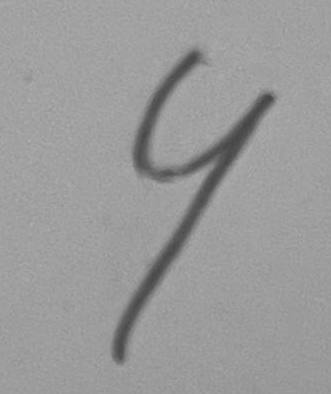

Original Image


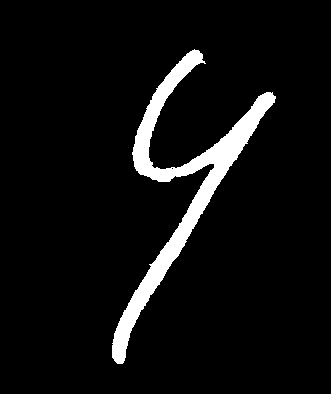

Binary Image


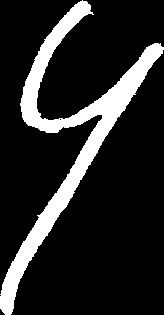

Centered Binary Image


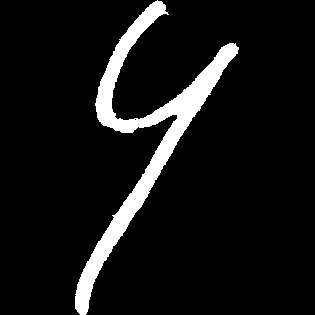

Zero Padding Added To Binary Image
Predicted label: class_6


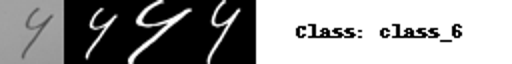

In [ ]:
from google.colab import files

# Define the class labels
class_labels = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6', 'class_7', 'class_8', 'class_9']

# Upload the image
upload_widget = files.upload()

# Load the pretrained model
model = resnet50(weights=None)
model.fc = torch.nn.Linear(2048, len(class_labels))
model.load_state_dict(torch.load('checkpoint/resnet50_model.pth'))
model = model.to(device)
model.eval()

# Process the uploaded image
for filename, file_contents in upload_widget.items():
    image = Image.open(io.BytesIO(file_contents)).convert('L')  # Convert to grayscale
    image1 = image
    image1.show()
    print("Original Image")

    # Convert image to binary
    binary_threshold = 128
    image = image.point(lambda x: 0 if x < binary_threshold else 255)
    
    # Convert image to negative
    image = Image.eval(image, lambda x: 255 - x)

    # Display the negative image
    image2 = image
    image2.show()
    print("Binary Image")

    # Find the outmost non-zero pixel
    width, height = image.size
    left, top, right, bottom = width, height, 0, 0
    pixels = image.load()
    for y in range(height):
        for x in range(width):
            if pixels[x, y] > 0:
                left = min(left, x)
                top = min(top, y)
                right = max(right, x)
                bottom = max(bottom, y)

    # Crop the image to remove zero padding
    image_centered = image.crop((left, top, right + 1, bottom + 1))
    max_size = max(image_centered.size)


    
 
    image3 = image_centered
    image3.show()
    print("Centered Binary Image")

    # Find the minimum and maximum height and width of the image
    min_size = min(image_centered.size)
    max_size = max(image_centered.size)

    # Calculate the padding size
    padding_size = max_size - min_size

    # Determine the side with the minimum size
    if image_centered.width == min_size:
        padding = (padding_size // 2, 0, padding_size - padding_size // 2, 0)  # Add padding horizontally
    else:
        padding = (0, padding_size // 2, 0, padding_size - padding_size // 2)  # Add padding vertically

    # Apply zero padding to the image
    padded_image = ImageOps.expand(image_centered, padding)

    image4 = padded_image
    image4.show()
    print("Zero Padding Added To Binary Image")

    
    # Resize the image while maintaining aspect ratio
    resize_transform = transforms.Resize((32, 32))
    resized_image = resize_transform(padded_image)

    # Convert the image to RGB
    rgb_image = resized_image.convert('RGB')
    
    # Convert the image to tensor and normalize
    to_tensor_transform = transforms.ToTensor()
    image_tensor = to_tensor_transform(rgb_image).unsqueeze(0).to(device)
    image_tensor = (image_tensor - 0.5) / 0.5

    # Forward pass through the model
    with torch.no_grad():
        output = model(image_tensor)

    # Get the predicted class label
    _, predicted_idx = torch.max(output, 1)
    predicted_label = class_labels[predicted_idx.item()]

    print("Predicted label:", predicted_label)

    # Stitch the images together
    stitched_image = Image.new('RGB', (rgb_image.width * 8, rgb_image.height))
    stitched_image.paste(image1.convert('RGB').resize((rgb_image.width, rgb_image.height)), (0, 0))
    stitched_image.paste(image2.convert('RGB').resize((rgb_image.width, rgb_image.height)), (rgb_image.width * 1, 0))
    stitched_image.paste(image3.convert('RGB').resize((rgb_image.width, rgb_image.height)), (rgb_image.width * 2, 0))
    stitched_image.paste(image4.convert('RGB').resize((rgb_image.width, rgb_image.height)), (rgb_image.width * 3, 0))

    # Create a new image with white background
    image5 = Image.new("RGB", (200, 100), (255, 255, 255))
    # Create a draw object
    draw = ImageDraw.Draw(image5)
    # Define the font and text
    font = ImageFont.load_default()
    text = f"Class: {predicted_label}"
    # Draw the text on the image
    draw.text((20, 10), text, fill=(0,), font=font)
    stitched_image.paste(image5.convert('RGB'), (rgb_image.width * 4, 0))


    stitched_image = stitched_image.resize((stitched_image.width*2,stitched_image.height*2))


    # Display the stitched image
    stitched_image.show()
